In [1]:
import pandas as pd
pd.set_option('display.max_columns', None) # to display all columns
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, roc_curve, auc, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn import tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, plot_confusion_matrix
from sklearn.pipeline import Pipeline

In [2]:
df = pd.read_csv('data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# change column names to all lowercase
df.columns = map(str.lower, df.columns)

In [5]:
# convert "No / Yes" binary options to numerical 0s and 1s
binary_columns = ['partner', 'dependents', 'phoneservice', 'paperlessbilling', 'churn']
df[binary_columns] = df[binary_columns].eq('Yes').mul(1)

# convert the categorical variables that have numeric significance into numerical
df.multiplelines = df.multiplelines.map({'No phone service':0, 'No':1, 'Yes':2})
df.contract = df.contract.map({'Month-to-month':0, 'One year':1, 'Two year':2})

# convert "Male / Female" binary options to numerical 0s and 1s
df['gender'] = df['gender'].eq('Female').mul(1)

In [6]:
df = df.drop(columns = 'customerid') # drop 'customerid' column.
df['totalcharges'] = df['totalcharges'].replace(' ', np.nan, regex=True) # replaces blank to NaN
df = df.dropna() # drop the NaN values
df['totalcharges'] = df.totalcharges.astype(float) # converts to float

In [7]:
# create dummy variables
df_dummified = pd.get_dummies(df, drop_first=True, dtype=int)

# Run a vanilla model based upon the information given. Use that as a benchmark.


In [8]:
# Scale the data
scale = MinMaxScaler()
df_dummified = pd.DataFrame(scale.fit_transform(df_dummified.values),
                            columns=df_dummified.columns,index=df_dummified.index)

In [9]:
df_dummified.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,contract,paperlessbilling,monthlycharges,totalcharges,churn,internetservice_Fiber optic,internetservice_No,onlinesecurity_No internet service,onlinesecurity_Yes,onlinebackup_No internet service,onlinebackup_Yes,deviceprotection_No internet service,deviceprotection_Yes,techsupport_No internet service,techsupport_Yes,streamingtv_No internet service,streamingtv_Yes,streamingmovies_No internet service,streamingmovies_Yes,paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
0,1.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.115423,0.001275,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.464789,1.0,0.5,0.5,0.0,0.385075,0.215867,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.014085,1.0,0.5,0.0,1.0,0.354229,0.010310,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.619718,0.0,0.0,0.5,0.0,0.239303,0.210241,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.014085,1.0,0.5,0.0,1.0,0.521891,0.015330,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [10]:
# Create features and labels
X = df_dummified.drop('churn', axis=1)  
y = df_dummified['churn'] 

# Perform an train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) # 70/30 for standard ML

In [11]:
# CREATING A PIPELINE
def pipeline(name_of_pipeline, classifier, X_train, y_train, X_test, y_test):
    '''Creates and displays the pipeline classifiers along with the report of metrics'''
    name_of_pipeline = Pipeline([('classifier', classifier)])
    name_of_pipeline.fit(X_train, y_train)
    y_pred_test = name_of_pipeline.predict(X_test)
    y_pred_train = name_of_pipeline.predict(X_train)
    
    report = classification_report(y_test, y_pred_test, output_dict=True)
    df = pd.DataFrame(report).transpose()
    
    print(df)
    print('\n\n')
    print(name_of_pipeline.fit(X_train, y_train))
    print('\n\n')
    print('Training Precision: ', round(precision_score(y_train, y_pred_train),3))
    print('Testing Precision: ', round(precision_score(y_test, y_pred_test),3))
    print('\n\n')
    print('Training Recall: ', round(recall_score(y_train, y_pred_train),3))
    print('Testing Recall: ', round(recall_score(y_test, y_pred_test),3))
    print('\n\n')
    print('Training Accuracy: ', round(accuracy_score(y_train, y_pred_train),3))
    print('Testing Accuracy: ', round(accuracy_score(y_test, y_pred_test),3))
    print('\n\n')
    print('Training F1-Score: ', round(f1_score(y_train, y_pred_train),3))
    print('Testing F1-Score: ', round(f1_score(y_test, y_pred_test),3))
    return

In [12]:
# defining the three different classification modeling techniques that will be used throughout this project
dt = DecisionTreeClassifier(random_state=0, max_depth=4)
knn = KNeighborsClassifier()
rf = RandomForestClassifier(random_state=0, n_estimators=100, max_depth=4)

In [13]:
# CALL THE PIPELINE
pipeline('pipe_1', dt, X_train, y_train, X_test, y_test)

              precision    recall  f1-score    support
0.0            0.813205  0.926688  0.866246  1555.0000
1.0            0.662722  0.403604  0.501680   555.0000
accuracy       0.789100  0.789100  0.789100     0.7891
macro avg      0.737964  0.665146  0.683963  2110.0000
weighted avg   0.773623  0.789100  0.770353  2110.0000



Pipeline(steps=[('classifier',
                 DecisionTreeClassifier(max_depth=4, random_state=0))])



Training Precision:  0.683
Testing Precision:  0.663



Training Recall:  0.412
Testing Recall:  0.404



Training Accuracy:  0.792
Testing Accuracy:  0.789



Training F1-Score:  0.514
Testing F1-Score:  0.502


In [14]:
def visualizing_confusionmatrix(name_of_pipeline, classifier, X_train, y_train, X_test, y_test):
    '''Creates confusion matrices of the results from classifier'''
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
    name_of_pipeline = Pipeline([('classifier', classifier)])
    name_of_pipeline.fit(X_train, y_train)
    y_pred_test = name_of_pipeline.predict(X_test)
    y_pred_train = name_of_pipeline.predict(X_train)
    
    #Plot Training Confusion Matrix
    plot_confusion_matrix(classifier, X_train, y_train, ax=axes[0,0],
                          display_labels=["Did Not Churn","Churned"])
    cm_train = confusion_matrix(y_train, y_pred_train)
    
    #Plot Normalized Training Confusion Matrix
    plot_confusion_matrix(classifier, X_train, y_train, ax=axes[1,0], 
                          display_labels=["Did Not Churn","Churned"],
                          normalize='true')
    
    #Plot Test Confusion Matrix
    plot_confusion_matrix(classifier, X_test, y_test, ax=axes[0,1],
                          display_labels=["Did Not Churn","Churned"])
    cm_test = confusion_matrix(y_test, y_pred_test)
    
    #Plot Normalized Test Confusion Matrix
    plot_confusion_matrix(classifier, X_test, y_test, ax=axes[1,1], 
                          display_labels=["Did Not Churn","Churned"],
                          normalize='true')
    
    axes[0,0].title.set_text(f'{classifier} Train')
    axes[0,1].title.set_text(f'{classifier} Test')
    axes[1,0].title.set_text(f'{classifier} Train')
    axes[1,1].title.set_text(f'{classifier} Test')
    
    plt.grid(False)
    plt.show()
    return

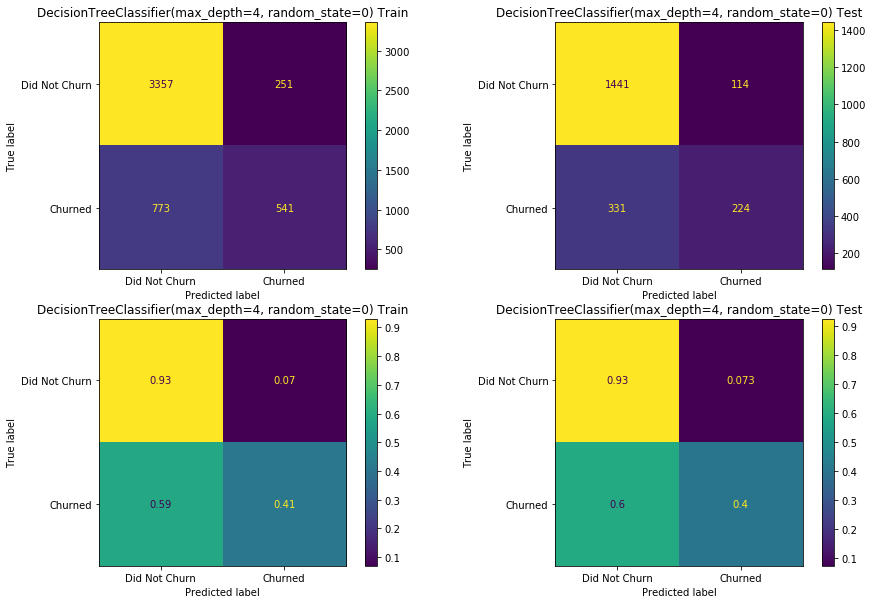

In [15]:
visualizing_confusionmatrix('pipe_1', dt, X_train, y_train, X_test, y_test)

In [16]:
def createROCCurve(name_of_pipeline, classifier, X_train, y_train, X_test, y_test):
    '''Creates and plots the ROC'''
    name_of_pipeline = Pipeline([('classifier', classifier)])
    name_of_pipeline.fit(X_train, y_train)
    y_train_score = name_of_pipeline.predict(X_train)
    
    # Calculate the fpr, tpr, and thresholds for the training set
    train_fpr, train_tpr, thresholds = roc_curve(y_train, y_train_score)
    
    # Calculate the probability scores of each point in the test set
    y_test_score = name_of_pipeline.predict(X_test)
    
    # Calculate the fpr, tpr, and thresholds for the test set
    test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score)
    
    plt.figure(figsize=(15, 10))
    lw = 2
    plt.plot(train_fpr, train_tpr, color='darkorange', lw=lw,
             label=('ROC curve for the trained data, AUC={:.3f}'.format(auc(test_fpr, test_tpr))))
    plt.plot(test_fpr, test_tpr, color='red', lw=lw,
             label=('ROC curve for the test data, AUC={:.3f}'.format(auc(train_fpr, train_tpr))))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.yticks([i/20.0 for i in range(21)])
    plt.xticks([i/20.0 for i in range(21)])
    plt.xlabel('False Positive Rate', fontsize=15)
    plt.ylabel('True Positive Rate', fontsize=15)
    plt.title('Receiver operating characteristic (ROC) Curve', fontsize=20)
    plt.legend(loc='lower right')
    plt.show()
    return

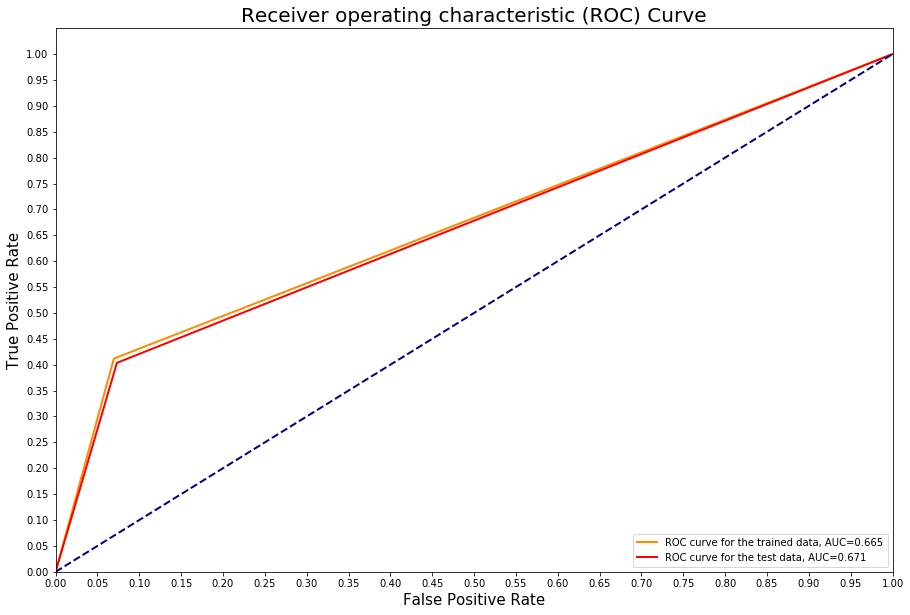

In [17]:
createROCCurve('pipe_1', dt, X_train, y_train, X_test, y_test)

## Results:
#### The baseline model is a Decision Tree
* The decision tree classifier has a max_depth=4
* Recall of the test data = 40.4%
* The baseline recall percentage of 40.4% in layman's terms means, "40.4% of customers who churned were correctly classified by the model."

## Goals:
#### Prioritize recall
* minimize Type II errors/false negative
* minimize costly situations where the company doesn't identify customers who are going to churn.

## Next Steps:
1. Address class imbalance (SMOTE)
2. Simplify the model by identifying and reducing unimportant features:
 * Feature engineering
 * LASSO - least absolute shrinkage and selection operator - L1 Regularization
3. Attempt different types of modeling techniques
 * KNN
 * Random Forests
4. Hyperparameter tuning (GridSearch to create multiple models with different hyperparameters)

In [18]:
def create_decisiontree(name_of_pipeline, classifier, dataframe, X_train, y_train, y):
    '''Creates and plots a decision tree'''
    name_of_pipeline = Pipeline([('classifier', classifier)])
    name_of_pipeline.fit(X_train, y_train)
    fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (15,10), dpi=300)
    tree.plot_tree(classifier, fontsize=5, feature_names = dataframe.columns,
                   class_names=np.unique(y).astype('str'), filled = True)
    for decision_box in tree.plot_tree(classifier, fontsize=5, feature_names = dataframe.columns,
                   class_names=np.unique(y).astype('str'), filled = True):
        arrow = decision_box.arrow_patch
        if arrow is not None:
            arrow.set_edgecolor('red')
            arrow.set_linewidth(3)
    plt.show()
    return

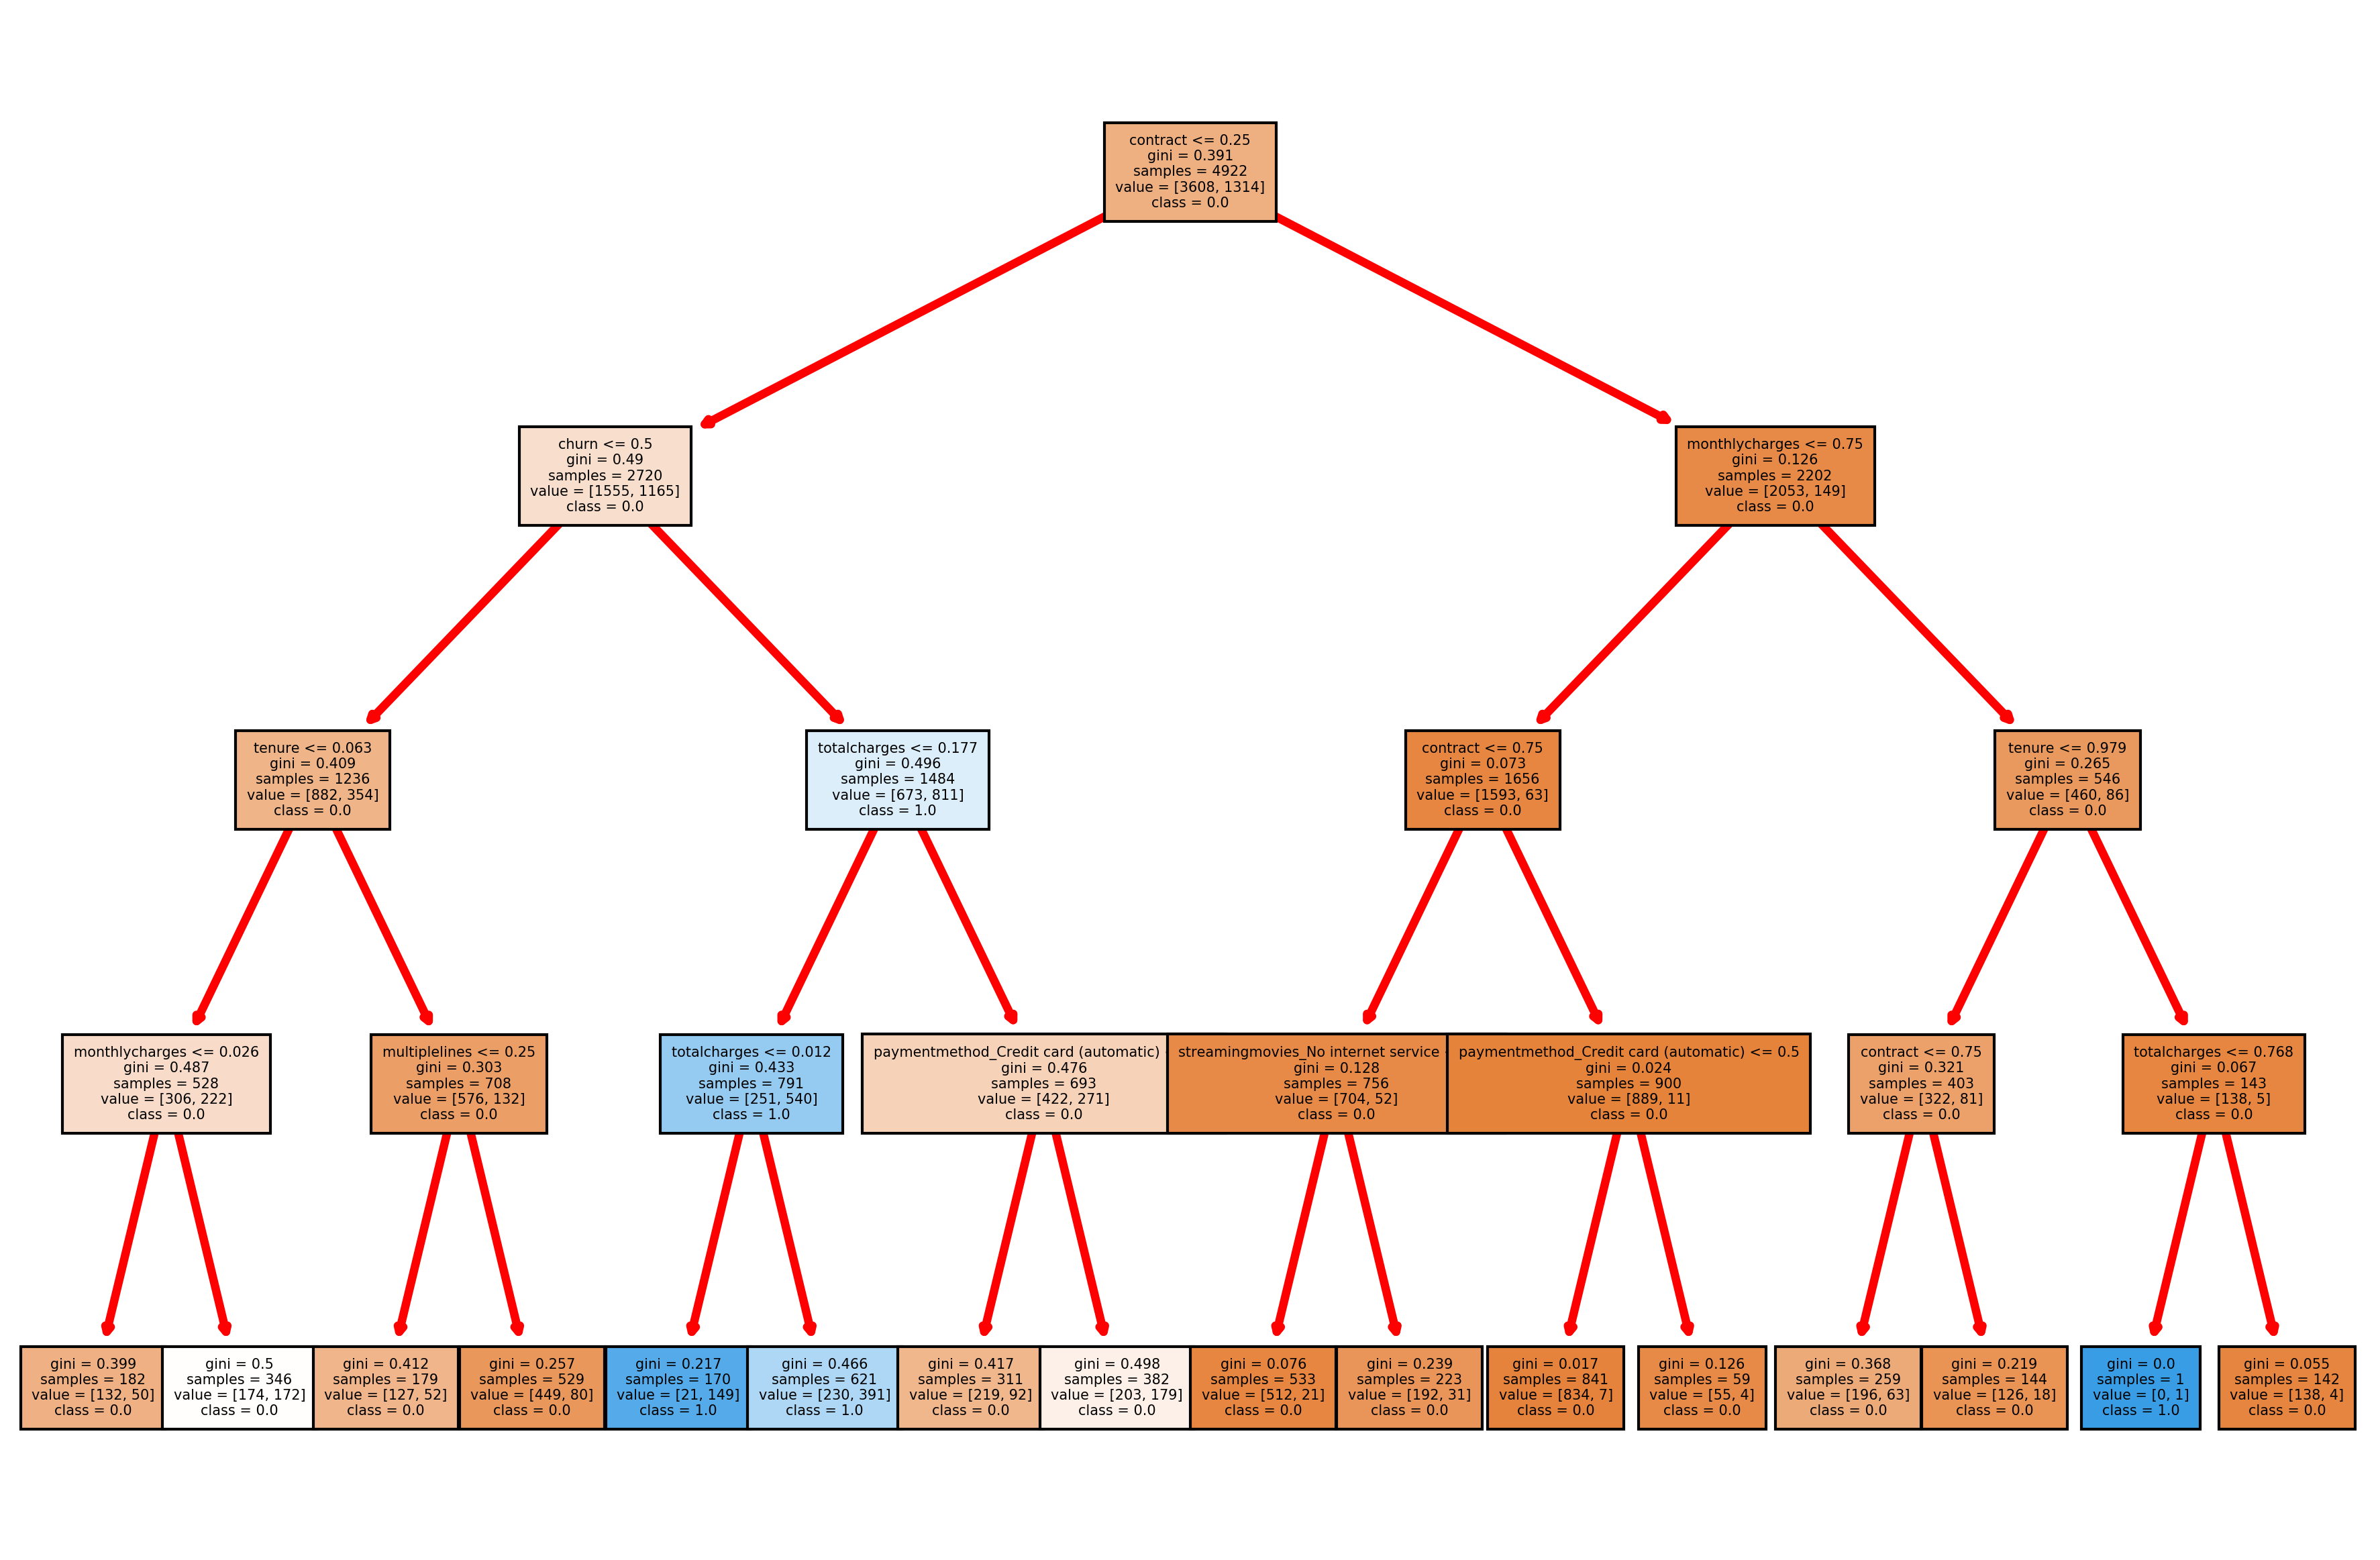

In [19]:
create_decisiontree('pipe_1', dt, df_dummified, X_train, y_train, y)

> Notes: Important features defining the nodes of the tree:
* 'contract'
* 'monthlycharges'
* 'paymentmethod_Credit card (automatic)'

# Model Iteration I - SMOTE

In [20]:
smote = SMOTE(random_state=0, sampling_strategy=1)
X_train_smote, y_train_smote = smote.fit_sample(X_train, y_train) 
# Preview synthetic sample class distribution
print('Synthetic sample class distribution: \n')
print(pd.Series(y_train_smote).value_counts()) 

Synthetic sample class distribution: 

1.0    3608
0.0    3608
Name: churn, dtype: int64


In [21]:
pipeline('pipe_2', dt, X_train_smote, y_train_smote, X_test, y_test)

              precision    recall  f1-score      support
0.0            0.907274  0.729904  0.808981  1555.000000
1.0            0.511059  0.790991  0.620934   555.000000
accuracy       0.745972  0.745972  0.745972     0.745972
macro avg      0.709167  0.760447  0.714957  2110.000000
weighted avg   0.803057  0.745972  0.759518  2110.000000



Pipeline(steps=[('classifier',
                 DecisionTreeClassifier(max_depth=4, random_state=0))])



Training Precision:  0.758
Testing Precision:  0.511



Training Recall:  0.851
Testing Recall:  0.791



Training Accuracy:  0.79
Testing Accuracy:  0.746



Training F1-Score:  0.802
Testing F1-Score:  0.621


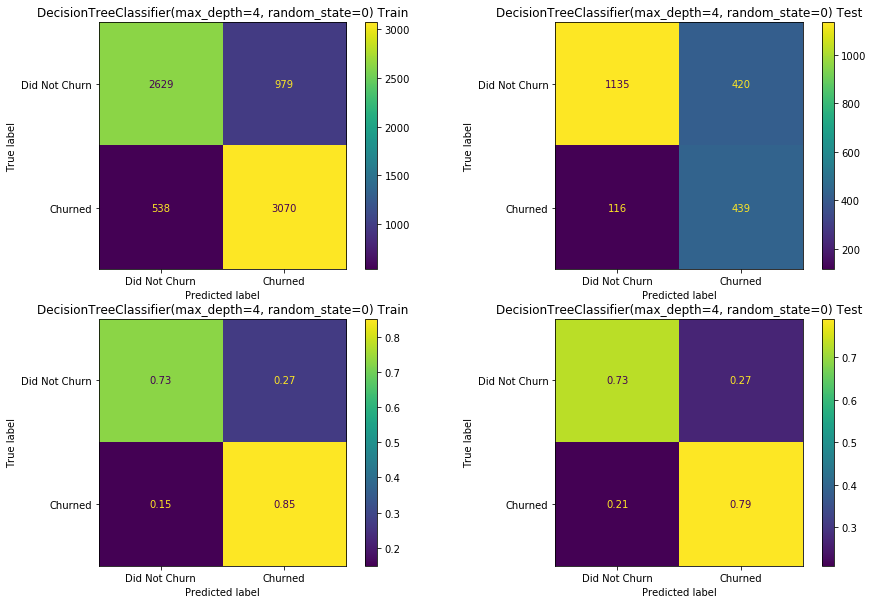

In [22]:
visualizing_confusionmatrix('pipe_2', dt, X_train_smote, y_train_smote, X_test, y_test)

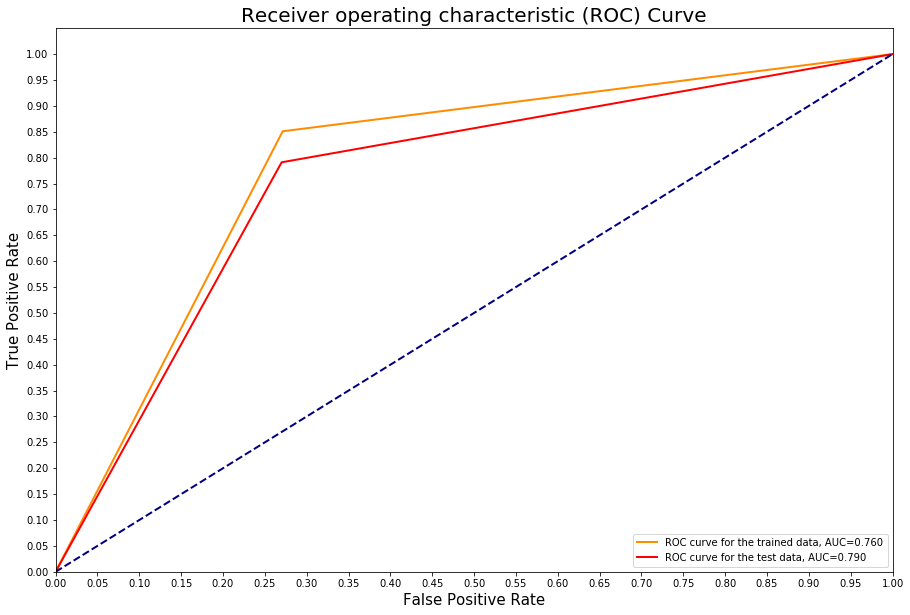

In [23]:
createROCCurve('pipe_2', dt, X_train_smote, y_train_smote, X_test, y_test)

## Results:
#### The first iteration model is a Decision Tree with addressing class imbalance using SMOTE
* The decision tree classifier has a max_depth=4
* Recall of the test data = 79.1%
* The baseline recall percentage of 79.1% in layman's terms means, "79.1% of customers who churned were correctly classified by the model."

## Next Steps:
1. Simplify the model by identifying and reducing unimportant features:
* Feature engineering
* LASSO - least absolute shrinkage and selection operator - L1 Regularization
2. Attempt different types of modeling techniques
* KNN
* Random Forests
3. Hyperparameter tuning (GridSearch to create multiple models with different hyperparameters)

# Model Iteration II - Feature engineering

In [24]:
# can drop 'phoneservice' column because 'multiplelines'
# already asks whether or not customer has phone service
df_featureengineered = df.drop(columns='phoneservice')

In [25]:
# convert "No / Yes" add-ons services to numerical 0s and 1s
add_on_services = ['onlinesecurity', 'onlinebackup', 'deviceprotection',
                   'techsupport', 'streamingtv', 'streamingmovies']
df_featureengineered[add_on_services] = df[add_on_services].eq('Yes').mul(1)
df_featureengineered[add_on_services] = df_featureengineered[add_on_services].astype(float)

In [26]:
# create a new column 'numberofaddons', which is the sum of the number of service add-ons a customer has
df_featureengineered['numberofaddons'] = df_featureengineered[add_on_services].sum(axis=1)

In [27]:
# drop all the individual columns relating to the single add-ons
df_featureengineered = df_featureengineered.drop(columns=add_on_services)

In [28]:
# drop all the column 'tenure' because it is more a qualitative, expressive category
# moreso about the length of time someone was a customer after the fact
df_featureengineered = df_featureengineered.drop(columns='tenure')

In [29]:
# create dummy variables
df_featureengineered_dummified = pd.get_dummies(df_featureengineered, drop_first=True, dtype=int)

# Scale the data
scale = MinMaxScaler()
df_featureengineered_dummified = pd.DataFrame(scale.fit_transform(df_featureengineered_dummified.values),
                                              columns=df_featureengineered_dummified.columns,
                                              index=df_featureengineered_dummified.index)

In [30]:
# Create features and labels
X_fe = df_featureengineered_dummified.drop('churn', axis=1)  
y_fe = df_featureengineered_dummified['churn'] 

# Perform an train_test_split = 70/30 for standard ML
X_fe_train, X_fe_test, y_fe_train, y_fe_test = train_test_split(X_fe, y_fe, test_size=0.3, random_state=0)

In [31]:
# SMOTE the data
smote = SMOTE(random_state=0, sampling_strategy=1)
X_fe_train_smote, y_fe_train_smote = smote.fit_sample(X_fe_train, y_fe_train) 
# Preview synthetic sample class distribution
print('Synthetic sample class distribution: \n')
print(pd.Series(y_fe_train_smote).value_counts()) 

Synthetic sample class distribution: 

1.0    3608
0.0    3608
Name: churn, dtype: int64


In [32]:
pipeline('pipe_3', dt, X_fe_train_smote, y_fe_train_smote, X_fe_test, y_fe_test)

              precision    recall  f1-score      support
0.0            0.896992  0.767203  0.827036  1555.000000
1.0            0.535897  0.753153  0.626217   555.000000
accuracy       0.763507  0.763507  0.763507     0.763507
macro avg      0.716445  0.760178  0.726627  2110.000000
weighted avg   0.802013  0.763507  0.774214  2110.000000



Pipeline(steps=[('classifier',
                 DecisionTreeClassifier(max_depth=4, random_state=0))])



Training Precision:  0.775
Testing Precision:  0.536



Training Recall:  0.79
Testing Recall:  0.753



Training Accuracy:  0.78
Testing Accuracy:  0.764



Training F1-Score:  0.782
Testing F1-Score:  0.626


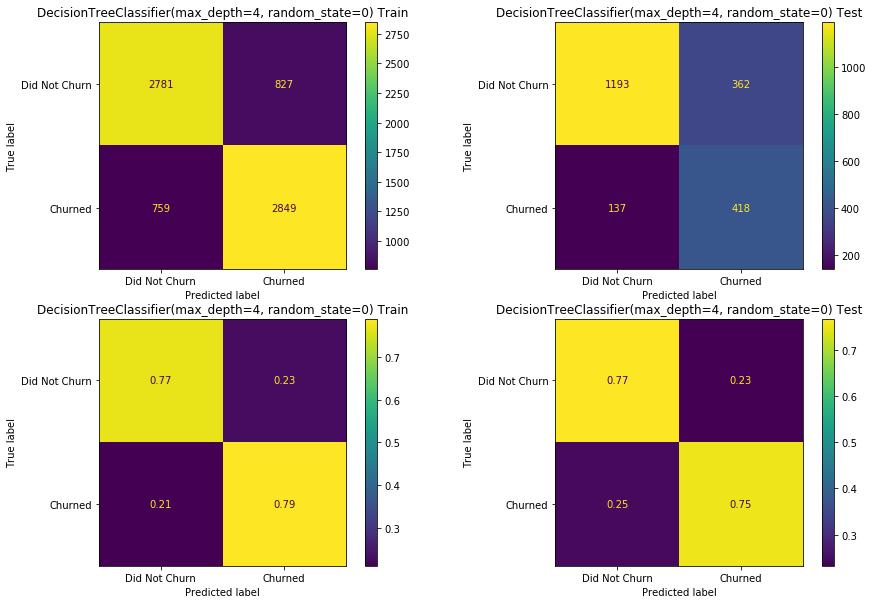

In [33]:
visualizing_confusionmatrix('pipe_3', dt, X_fe_train_smote, y_fe_train_smote, X_fe_test, y_fe_test)

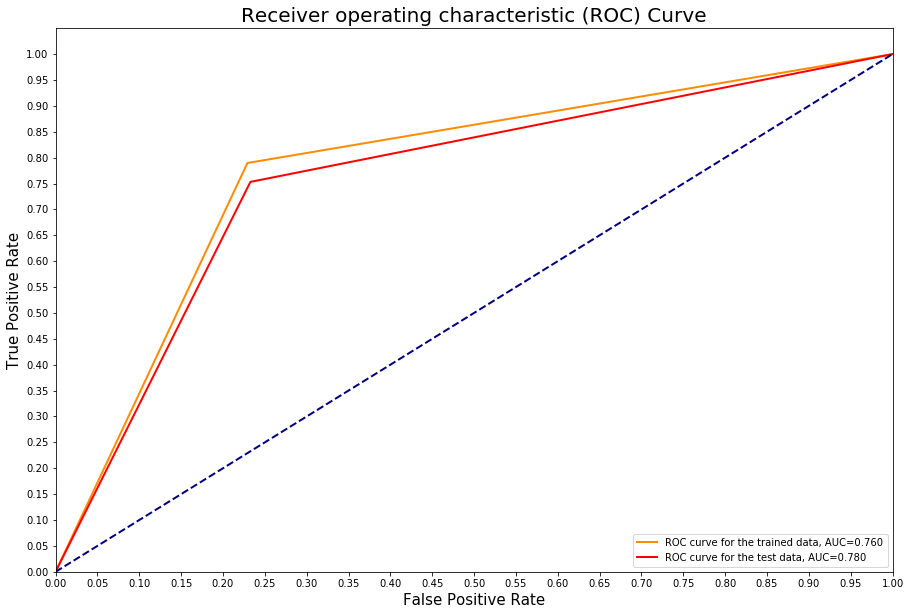

In [34]:
createROCCurve('pipe_3', dt, X_fe_train_smote, y_fe_train_smote, X_fe_test, y_fe_test)

## Results:
#### The second iteration model is a Decision Tree with feature engineering to remove unecessary variables and addressing class imbalance using SMOTE
* The decision tree classifier has a max_depth=4
* Recall of the test data = 75.3%
* The baseline recall percentage of 75.3% in layman's terms means, "75.3% of customers who churned were correctly classified by the model."
* This model does not have as good as a recall as the previous model.

## Next Steps:
1. Attempt different types of modeling techniques
* KNN
* Random Forests
2. Hyperparameter tuning (GridSearch to create multiple models with different hyperparameters)

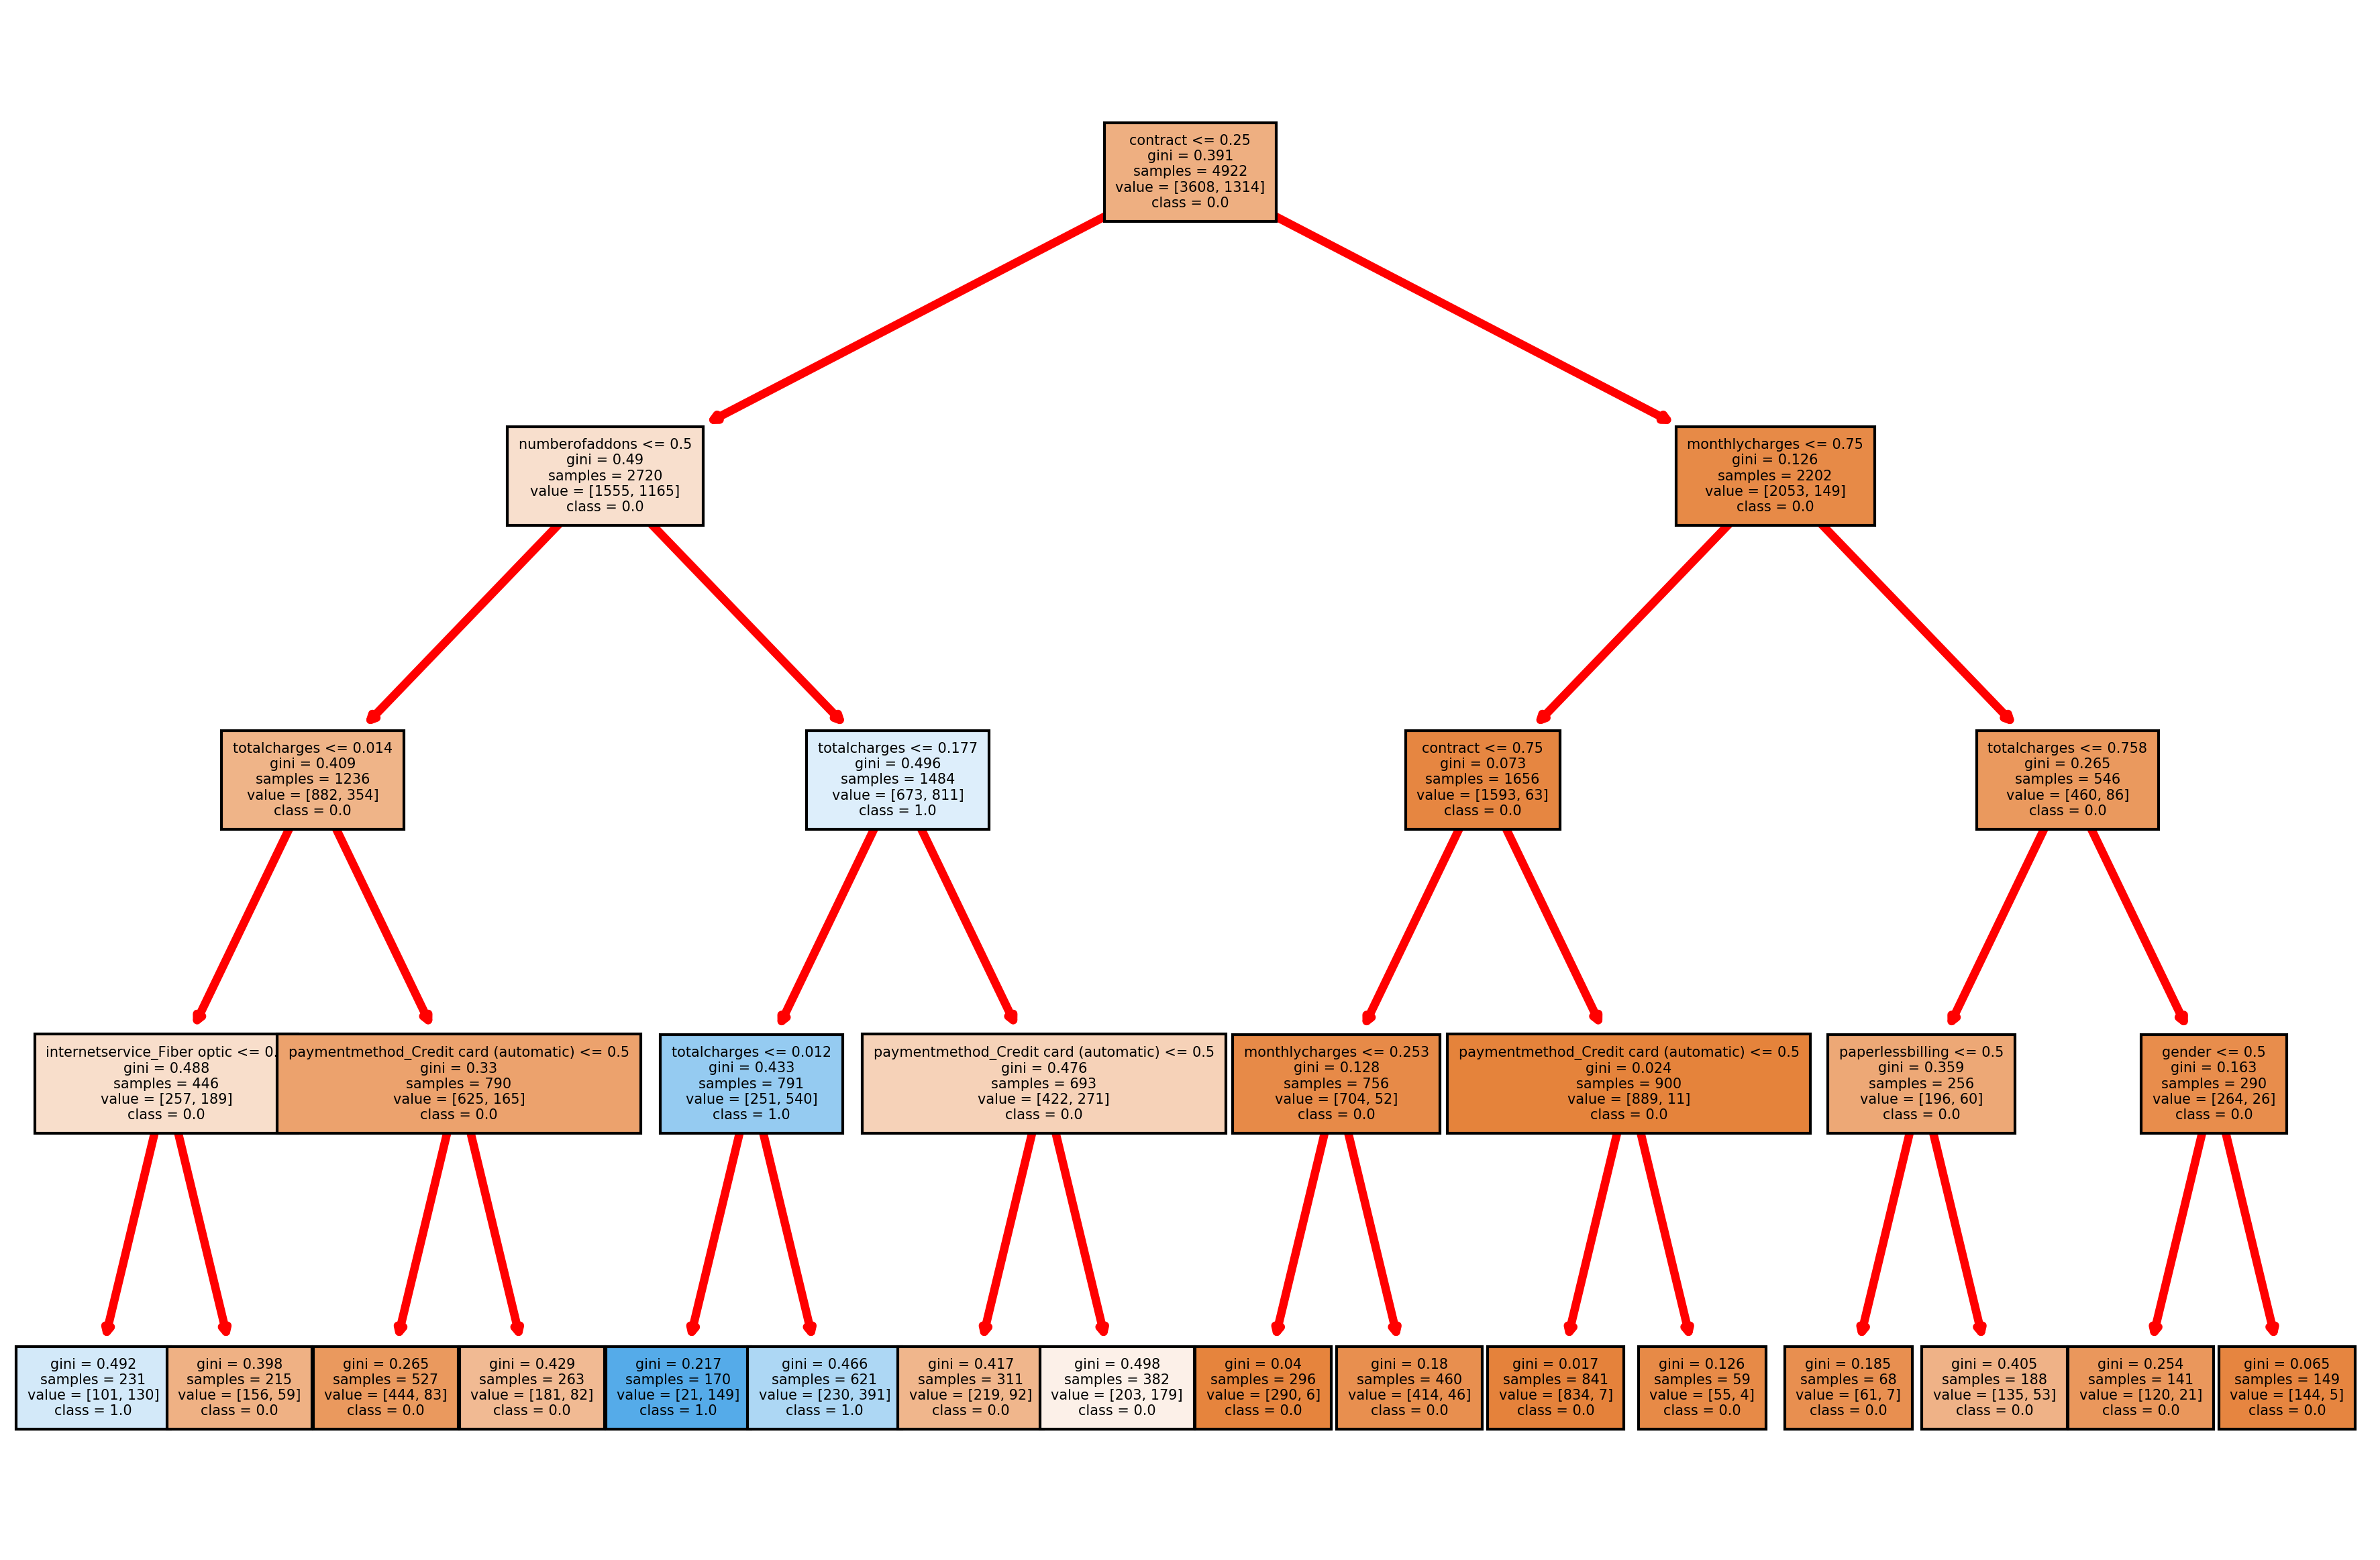

In [35]:
create_decisiontree('pipe_3', dt, df_featureengineered_dummified, X_fe_train, y_fe_train, y_fe)

> Notes: Important features defining the nodes of the tree:
* 'contract'
* 'monthlycharges'
* 'paymentmethod_Credit card (automatic)'

# Model Iteration III - Attempting different classification models

In [36]:
# def plot_feature_importances(model):
#    n_features = data_train.shape[1]
#    plt.figure(figsize=(8,8))
#    plt.barh(range(n_features), model.feature_importances_, align='center') 
#    plt.yticks(np.arange(n_features), data_train.columns.values) 
#    plt.xlabel('Feature importance')
#    plt.ylabel('Feature')

# plot_feature_importances(tree_clf)